In [25]:
pip install ucimlrepo

In [26]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # Already scaled, but ensure

In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [29]:
X.shape

(303, 13)

In [30]:
df = pd.concat([X, y], axis=1)
# Binarize target: 0 = no disease, 1 = disease
df['target'] = np.where(df['num'] > 0, 1, 0)
df.drop('num', axis=1, inplace=True)
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (303, 14)


In [31]:
# Step 2: Handle missing values
print("Missing values before imputation:\n", df.isnull().sum())
imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical
missing_cols = ['ca', 'thal']  # Known missing columns
df[missing_cols] = imputer.fit_transform(df[missing_cols])
print("Missing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [32]:
# Step 3: Perform data encoding
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']  # Treat 'ca' as categorical
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
# Combine with non-categorical columns
non_cat_cols = [col for col in df.columns if col not in categorical_cols]
df_encoded = pd.concat([df[non_cat_cols], encoded_df], axis=1)
print("Encoded dataset shape:", df_encoded.shape)

Encoded dataset shape: (303, 21)


In [33]:
# Step 4: Standardize numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("Scaled numerical features.")

Scaled numerical features.


Summary statistics:
                 age         sex      trestbps          chol         fbs  \
count  3.030000e+02  303.000000  3.030000e+02  3.030000e+02  303.000000   
mean  -1.465641e-18    0.679868  4.426236e-16  2.345026e-16    0.148515   
std    1.001654e+00    0.467299  1.001654e+00  1.001654e+00    0.356198   
min   -2.819115e+00    0.000000 -2.145037e+00 -2.334877e+00    0.000000   
25%   -7.135564e-01    0.000000 -6.652997e-01 -6.905030e-01    0.000000   
50%    1.729945e-01    1.000000 -9.616980e-02 -1.101357e-01    0.000000   
75%    7.270888e-01    1.000000  4.729601e-01  5.476139e-01    0.000000   
max    2.500191e+00    1.000000  3.887739e+00  6.138485e+00    1.000000   

            thalach       exang       oldpeak      target        cp_2  ...  \
count  3.030000e+02  303.000000  3.030000e+02  303.000000  303.000000  ...   
mean  -1.172513e-16    0.326733  2.345026e-17    0.458746    0.165017  ...   
std    1.001654e+00    0.469794  1.001654e+00    0.499120    0.371809

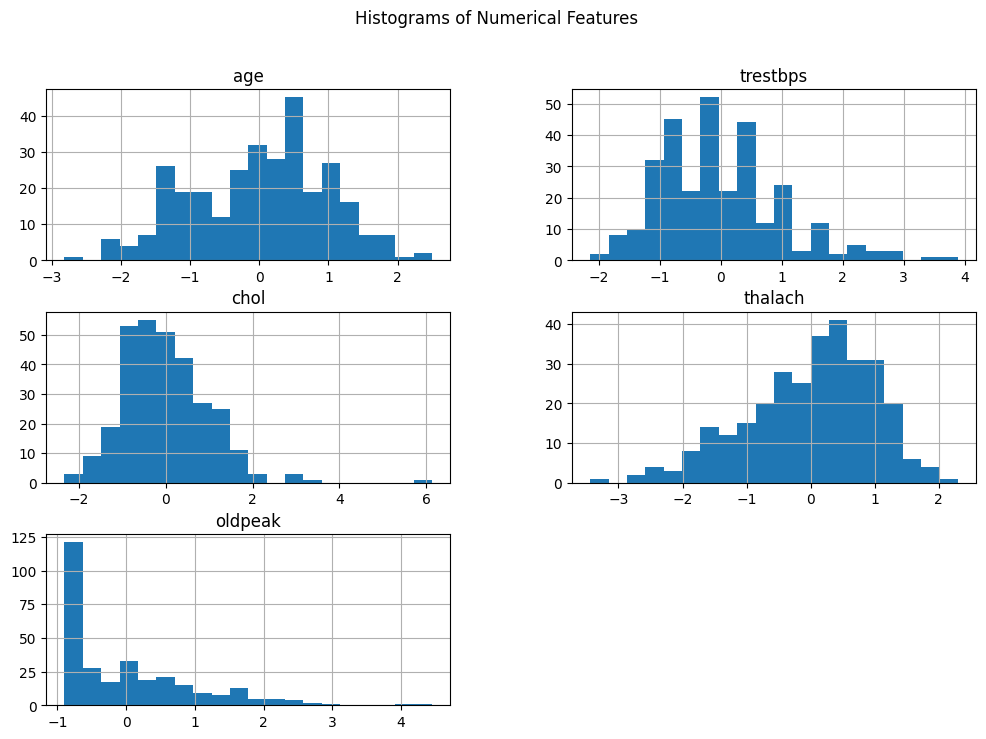

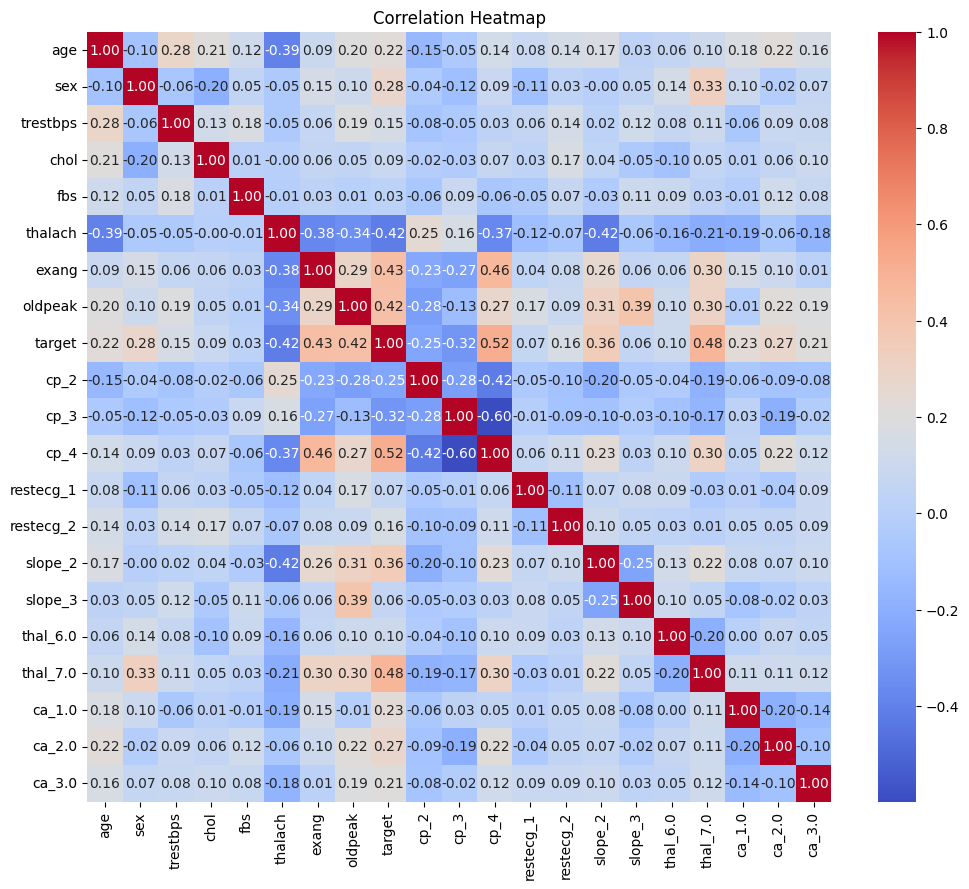

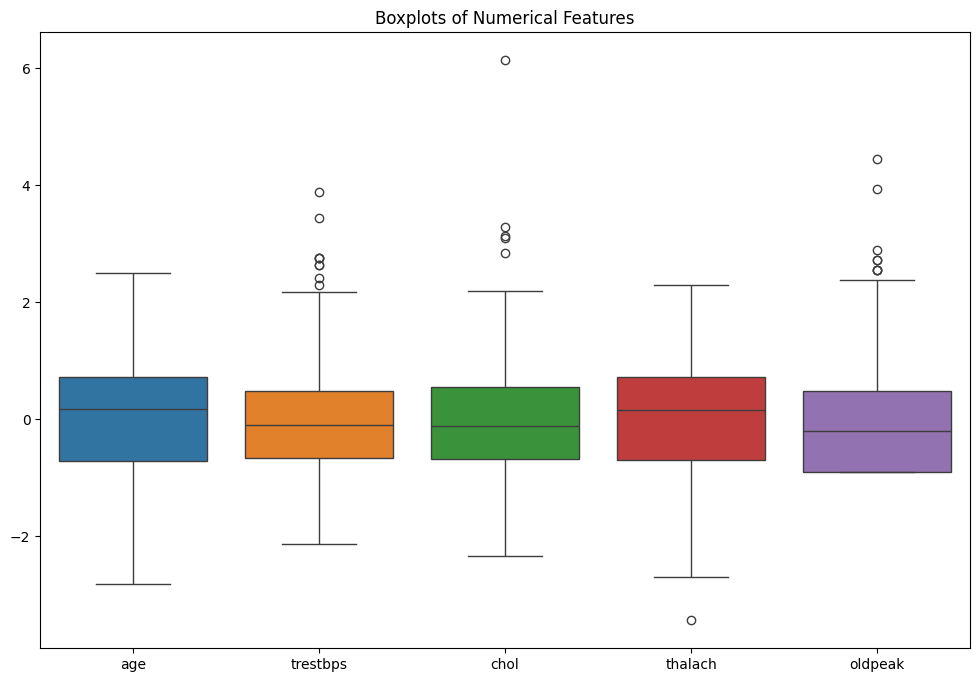

Cleaned dataset saved as 'cleaned_heart_disease.csv'.


In [34]:
# Step 5: Conduct Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary statistics:\n", df_encoded.describe())

# Histograms
df_encoded[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_encoded[numerical_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

# Save cleaned dataset
df_encoded.to_csv('cleaned_heart_disease.csv', index=False)
print("Cleaned dataset saved as 'cleaned_heart_disease.csv'.")